In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import sys, os, git
from scipy import constants as cst
from pint import UnitRegistry
ureg = UnitRegistry()

In [7]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'

In [8]:
Wood1957 = np.loadtxt("literature-data/excess-energy.dat")

In [33]:
kB = cst.Boltzmann*ureg.J/ureg.kelvin # boltzman constant
Na = cst.Avogadro/ureg.mole # avogadro
R = kB*Na # gas constant

In [48]:
jump = 10
N_atom = 200
T = (273.15+55)*ureg.kelvin # 55°C
Epot_vs_tau = []
for folder in [x[0] for x in os.walk("./")]:
    if "outputs_tau" in folder:
        Epot = np.mean(np.loadtxt(folder+"/Epot.dat")[:,1][jump:]) # kcal/mol
        Epot = (Epot*ureg.kcal/ureg.mol).to(ureg.joule/ureg.mol)
        Enormalised =  Epot / N_atom / R / T # no units
        Epot_vs_tau.append([np.float32(folder.split("./outputs_tau")[1]), Enormalised.magnitude])
Epot_vs_tau = np.array(Epot_vs_tau)

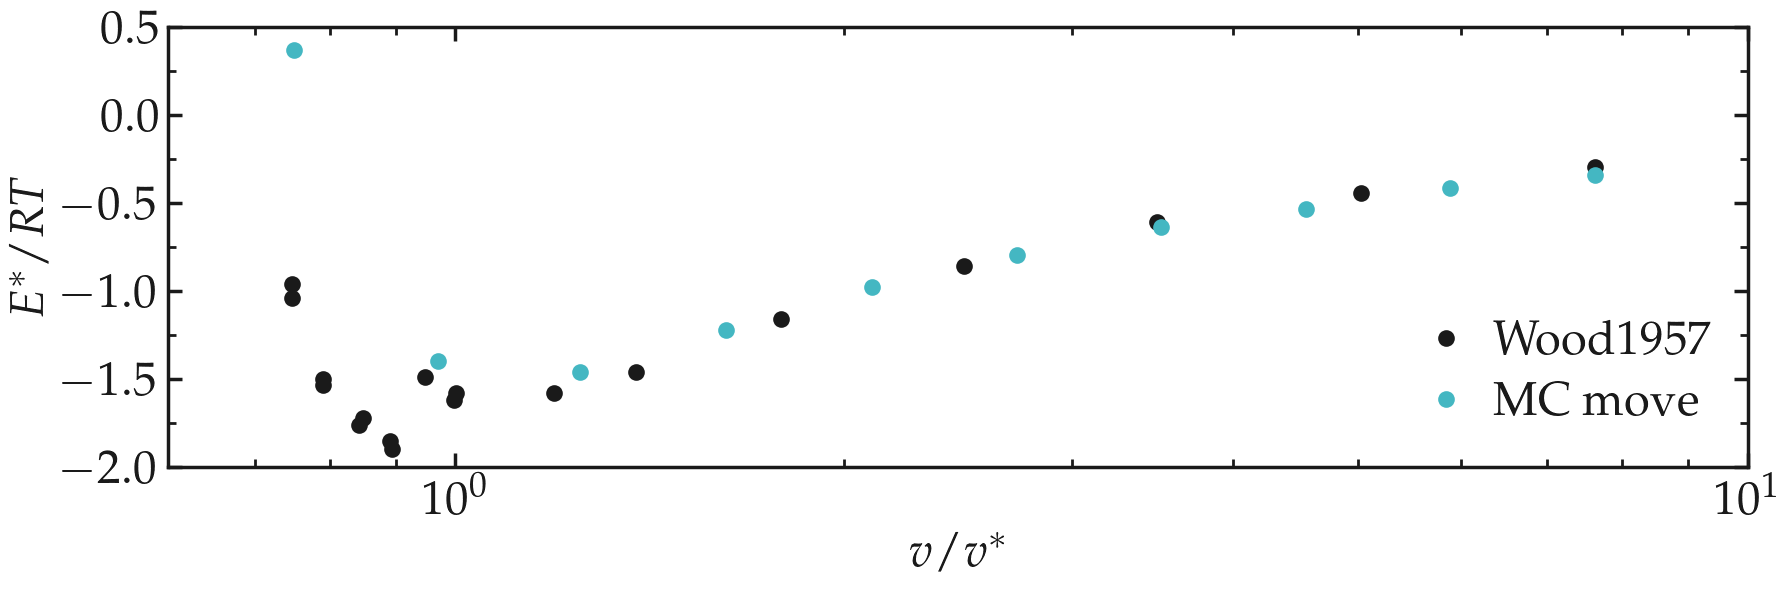

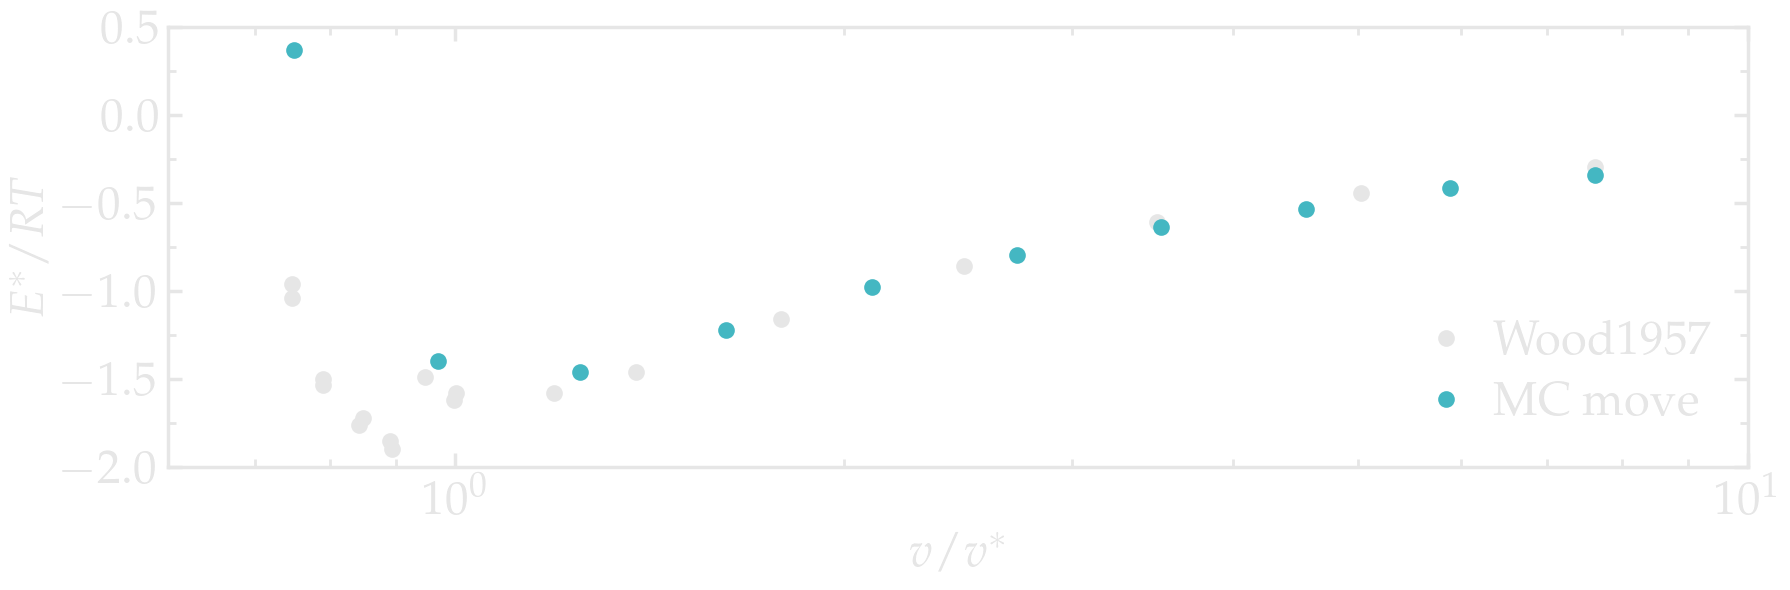

In [52]:
filename = "energy-vs-density"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                        transparency = True, use_serif=True)
    myplt.add_panel()
    myplt.add_plot(x = Wood1957[:,0], y = Wood1957[:,1], type = "semilogx",
                   linewidth_data = 3, marker = "o", data_color = "autogray",
                   markersize = 12, data_label = r'$\mathrm{Wood1957}$')
    myplt.add_plot(x = Epot_vs_tau[:,0], y = Epot_vs_tau[:,1], type = "semilogx",
                   linewidth_data = 3, marker = "o", data_color = 0,
                   markersize = 12, data_label = r'$\mathrm{MC~move}$')
    myplt.complete_panel(ylabel = r'$E^* / R T$', xlabel = r'$v / v^*$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(0.6, 10), y_ticks=np.arange(-2., 0.6, 0.5),
                         y_boundaries=(-2, 0.5))
    myplt.save_figure(filename = filename, saving_path = './')

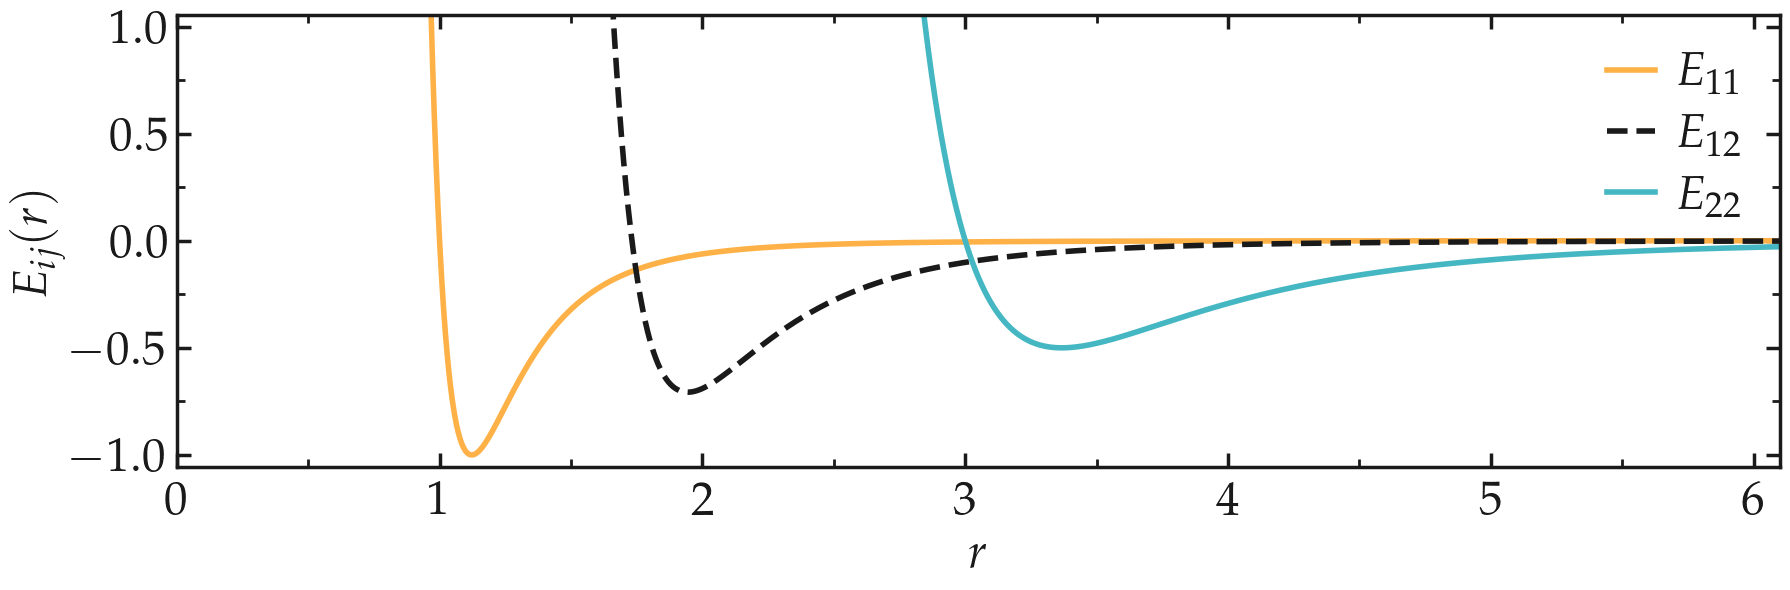

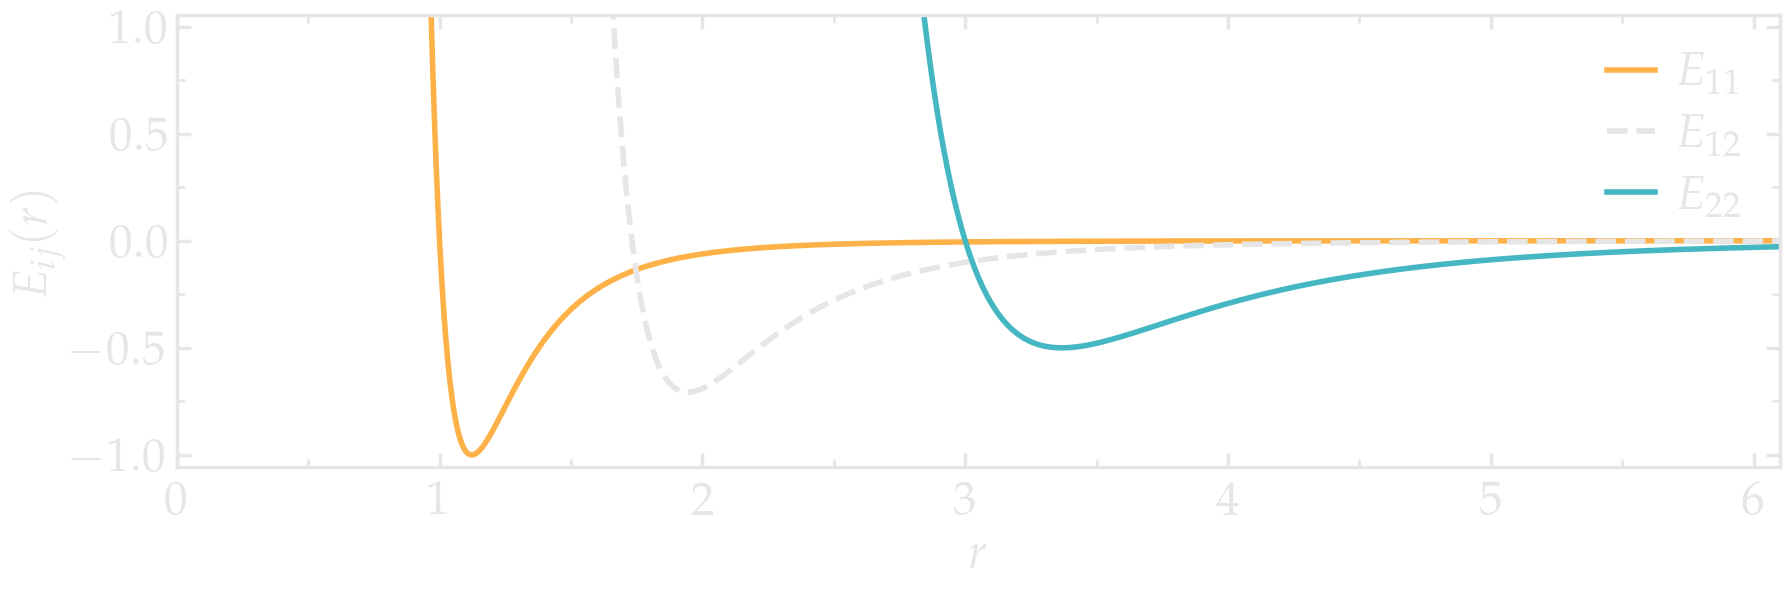